In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import xgboost

In [4]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [5]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [6]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [7]:
target = df['Biopsy']
target_cols = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
X = df.drop(target_cols, axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=7)

In [9]:
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)
xgb_full = xgboost.DMatrix(X, label=target)

In [10]:
params = {
    'eta': 0.002,
    'max_depth': 7,
    'objective': 'binary:logistic',
    'subsample':0.5
}
model = xgboost.train(params, xgb_full, 5000, evals=[(xgb_full, 'test')], verbose_eval=1000)

[0]	test-error:0.06177
[1000]	test-error:0.06410
[2000]	test-error:0.05944
[3000]	test-error:0.05012
[4000]	test-error:0.04546
[4999]	test-error:0.03730


In [12]:
import shap

In [13]:
shap_values = shap.TreeExplainer(model).shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


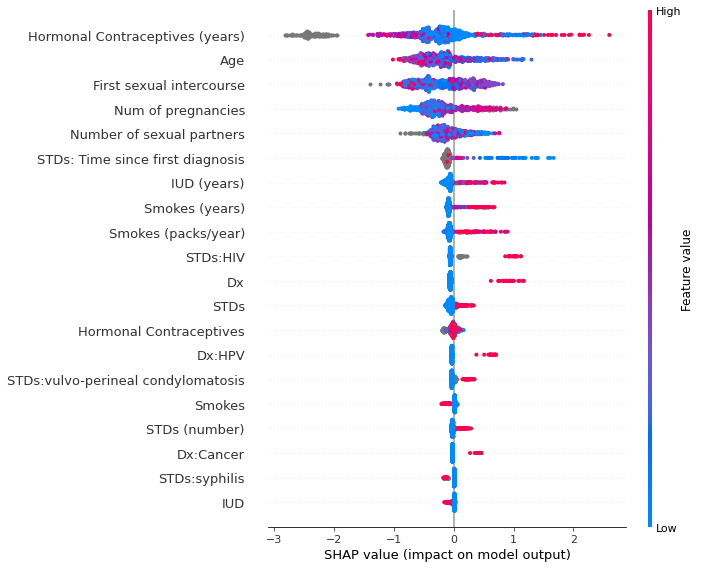

In [14]:
shap.summary_plot(shap_values, X)

In [22]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [23]:
target[:30]

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
23    1
24    0
25    0
26    0
27    0
28    0
29    0
Name: Biopsy, dtype: int64

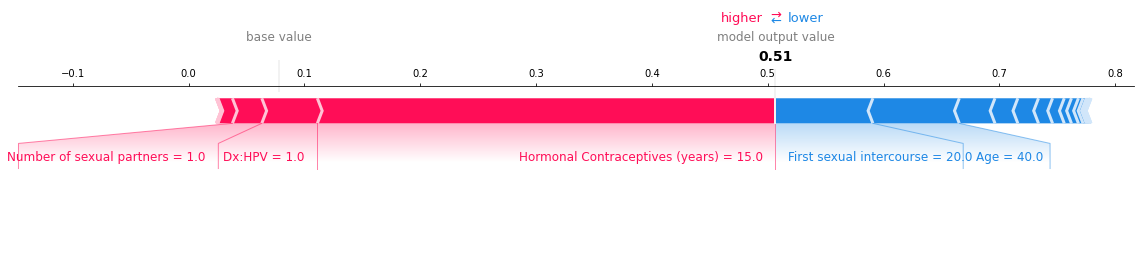

In [26]:
patient_id = 23
shap.force_plot(expected_value, shap_values[patient_id], X.iloc[patient_id], link='logit', matplotlib=True)